In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Cancer_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [10]:
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [19]:
features=['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
X=df[features]
y=df.diagnosis

In [20]:
sample=df[features]
sample.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **KNN Classifier**

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=3)
knn_classifier. fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [24]:
from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.9473684210526315


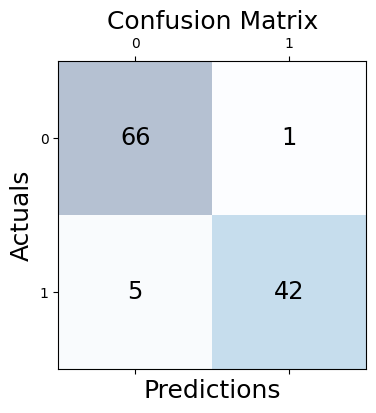

In [25]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski',p=3)
knn_classifier. fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [28]:
from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.9473684210526315


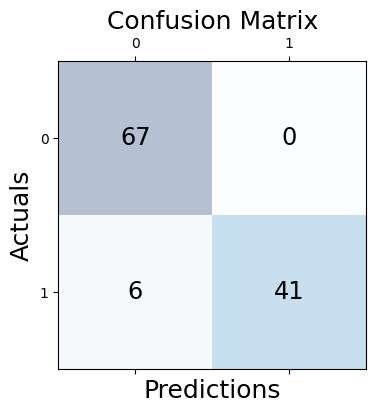

In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Naive Bayes**

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9078947368421053


**Decision Tree**

In [43]:
from sklearn.tree import DecisionTreeClassifier 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30,random_state=1) 

In [44]:
clf=DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9473684210526315


**Outlier Detection**

In [45]:
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

**I am taking radius mean column**

In [48]:
sample_list=df['radius_mean'].tolist()
sample_list

[17.99,
 20.57,
 19.69,
 11.42,
 20.29,
 12.45,
 18.25,
 13.71,
 13.0,
 12.46,
 16.02,
 15.78,
 19.17,
 15.85,
 13.73,
 14.54,
 14.68,
 16.13,
 19.81,
 13.54,
 13.08,
 9.504,
 15.34,
 21.16,
 16.65,
 17.14,
 14.58,
 18.61,
 15.3,
 17.57,
 18.63,
 11.84,
 17.02,
 19.27,
 16.13,
 16.74,
 14.25,
 13.03,
 14.99,
 13.48,
 13.44,
 10.95,
 19.07,
 13.28,
 13.17,
 18.65,
 8.196,
 13.17,
 12.05,
 13.49,
 11.76,
 13.64,
 11.94,
 18.22,
 15.1,
 11.52,
 19.21,
 14.71,
 13.05,
 8.618,
 10.17,
 8.598,
 14.25,
 9.173,
 12.68,
 14.78,
 9.465,
 11.31,
 9.029,
 12.78,
 18.94,
 8.888,
 17.2,
 13.8,
 12.31,
 16.07,
 13.53,
 18.05,
 20.18,
 12.86,
 11.45,
 13.34,
 25.22,
 19.1,
 12.0,
 18.46,
 14.48,
 19.02,
 12.36,
 14.64,
 14.62,
 15.37,
 13.27,
 13.45,
 15.06,
 20.26,
 12.18,
 9.787,
 11.6,
 14.42,
 13.61,
 6.981,
 12.18,
 9.876,
 10.49,
 13.11,
 11.64,
 12.36,
 22.27,
 11.34,
 9.777,
 12.63,
 14.26,
 10.51,
 8.726,
 11.93,
 8.95,
 14.87,
 15.78,
 17.95,
 11.41,
 18.66,
 24.25,
 14.5,
 13.37,
 13.85,
 1

In [49]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

# Driver code
sample_outliers = detect_outliers_zscore(sample_list)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [25.22, 27.22, 28.11, 25.73, 27.42]


Text(0.5, 0, 'Sample')

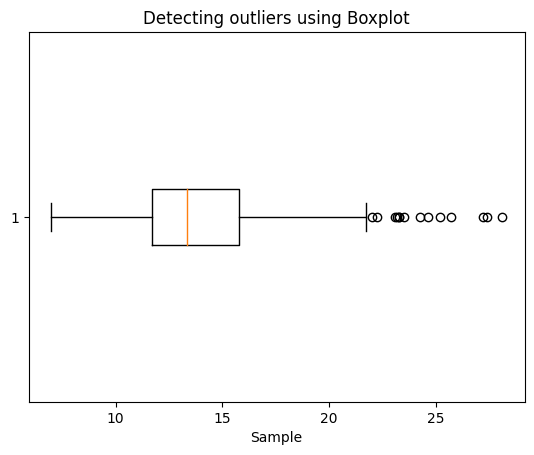

In [50]:
plt.boxplot(sample_list, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [51]:
data = sorted(sample_list)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
out=[]
for item in data.copy():
    if (item<lwr_bound or item>upr_bound):
        out.append(item)
        data.remove(item)

print("Outliers: ",out)

Outliers:  [22.01, 22.27, 23.09, 23.21, 23.27, 23.29, 23.51, 24.25, 24.63, 25.22, 25.73, 27.22, 27.42, 28.11]


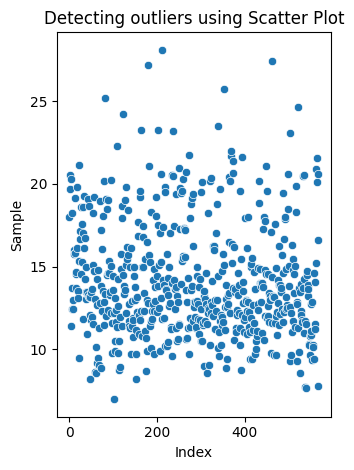

In [53]:
import seaborn as sns
plt.subplot(1, 2, 2)
sns.scatterplot(x=range(len(sample_list)), y=sample_list)
plt.title("Detecting outliers using Scatter Plot")
plt.xlabel('Index')
plt.ylabel('Sample')

plt.tight_layout()
plt.show()

**Outlier Removing by comparing and deleting data which matched with outlier**

**Note: here I have taken outliers which were found by using z score method in and stored in sample_outlier**

In [58]:
data = sorted(sample_list)
print("Before Removing outlier:\n",data)
a = np.array(data)
for i in sample_outliers:
    a = np.delete(a, np.where(a == i))  # Removing the outlier from 'a'
print("After removing outliers:\n",a)


Before Removing outlier:
 [6.981, 7.691, 7.729, 7.76, 8.196, 8.219, 8.571, 8.597, 8.598, 8.618, 8.671, 8.726, 8.734, 8.878, 8.888, 8.95, 9.0, 9.029, 9.042, 9.173, 9.268, 9.295, 9.333, 9.397, 9.405, 9.423, 9.436, 9.465, 9.504, 9.567, 9.606, 9.667, 9.668, 9.676, 9.683, 9.72, 9.731, 9.738, 9.742, 9.742, 9.755, 9.777, 9.787, 9.847, 9.876, 9.876, 9.904, 10.03, 10.05, 10.08, 10.16, 10.17, 10.18, 10.2, 10.25, 10.26, 10.26, 10.26, 10.29, 10.32, 10.44, 10.48, 10.48, 10.49, 10.49, 10.51, 10.51, 10.57, 10.57, 10.6, 10.65, 10.66, 10.71, 10.75, 10.8, 10.8, 10.82, 10.86, 10.88, 10.9, 10.91, 10.94, 10.95, 10.96, 10.97, 11.04, 11.04, 11.06, 11.06, 11.06, 11.08, 11.08, 11.13, 11.13, 11.14, 11.15, 11.16, 11.2, 11.22, 11.22, 11.25, 11.26, 11.26, 11.27, 11.27, 11.28, 11.29, 11.3, 11.31, 11.32, 11.33, 11.34, 11.34, 11.36, 11.37, 11.41, 11.41, 11.42, 11.43, 11.43, 11.45, 11.46, 11.47, 11.49, 11.5, 11.51, 11.52, 11.52, 11.54, 11.54, 11.57, 11.6, 11.6, 11.6, 11.61, 11.62, 11.63, 11.64, 11.66, 11.67, 11.68, 11

**Removing outlier using IQR**

In [55]:
data = sorted(sample_list)
print("Before Removing outlier\n",data)
for item in data.copy():
    if (item<lwr_bound or item>upr_bound):
        data.remove(item)

print("Sorted Data after removing outlier by using IQR Score\n",data) 

Before Removing outlier
 [6.981, 7.691, 7.729, 7.76, 8.196, 8.219, 8.571, 8.597, 8.598, 8.618, 8.671, 8.726, 8.734, 8.878, 8.888, 8.95, 9.0, 9.029, 9.042, 9.173, 9.268, 9.295, 9.333, 9.397, 9.405, 9.423, 9.436, 9.465, 9.504, 9.567, 9.606, 9.667, 9.668, 9.676, 9.683, 9.72, 9.731, 9.738, 9.742, 9.742, 9.755, 9.777, 9.787, 9.847, 9.876, 9.876, 9.904, 10.03, 10.05, 10.08, 10.16, 10.17, 10.18, 10.2, 10.25, 10.26, 10.26, 10.26, 10.29, 10.32, 10.44, 10.48, 10.48, 10.49, 10.49, 10.51, 10.51, 10.57, 10.57, 10.6, 10.65, 10.66, 10.71, 10.75, 10.8, 10.8, 10.82, 10.86, 10.88, 10.9, 10.91, 10.94, 10.95, 10.96, 10.97, 11.04, 11.04, 11.06, 11.06, 11.06, 11.08, 11.08, 11.13, 11.13, 11.14, 11.15, 11.16, 11.2, 11.22, 11.22, 11.25, 11.26, 11.26, 11.27, 11.27, 11.28, 11.29, 11.3, 11.31, 11.32, 11.33, 11.34, 11.34, 11.36, 11.37, 11.41, 11.41, 11.42, 11.43, 11.43, 11.45, 11.46, 11.47, 11.49, 11.5, 11.51, 11.52, 11.52, 11.54, 11.54, 11.57, 11.6, 11.6, 11.6, 11.61, 11.62, 11.63, 11.64, 11.66, 11.67, 11.68, 11.